In [1]:
# Regular Modules
import numpy as np
import matplotlib.pyplot as plt
import datetime
import matplotlib.tri as tri
import datetime

# My Modules
import src.helpers as helpers

# Use timestamp for saving
time = datetime.datetime.now().strftime("%Y_%m%d_%H%M%S")
%matplotlib inline
plt.rcParams['figure.dpi'] = 100 # default is 75
plt.style.use('default')


## Load in a long trajectory for pruning

(2, 50000)


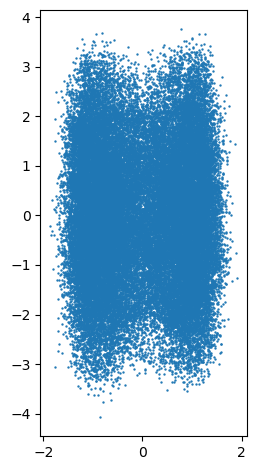

In [2]:
fname = "systems/MoroCardin/data/trajectory_metad_verylong.npz"
inData = np.load(fname)
data = inData["data"]

print(data.shape)
N = data.shape[1]

fig = plt.figure() 
plt.scatter(data[0, :], data[1, :], s=0.5)
#plt.colorbar()
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')

In [3]:
# Delta-net
deltanet_bool = np.zeros(N, dtype=bool)
deltanet_bool[0] = True

net = np.zeros_like(data)
net[:, 0] = data[:, 0] 
Nnet = 1

delta = 0.02997

for i in range(1, N):
    dists = np.sqrt(np.sum((data[:,i].reshape(2,1) - net)**2, axis=0))
    if np.all(dists > delta):
        deltanet_bool[i] = True
        net[:, Nnet] = data[:, i]
        Nnet += 1
    if np.mod(i, 10000) == 0:
        print(i)
print(Nnet)
# Optional: prune the data-set for isolated points
#for i in range(1, N):
#    if deltanet_bool[i]:
#        dists = np.sqrt(np.sum((data[:, i].reshape(2,1) - net)**2, axis=0))
#        dists = dists[dists > 0]
#        deltanet_bool[i] = np.any(dists < 2*delta)
#net = data[:, deltanet_bool]
#print(net.shape)


10000
20000
30000
40000
10011


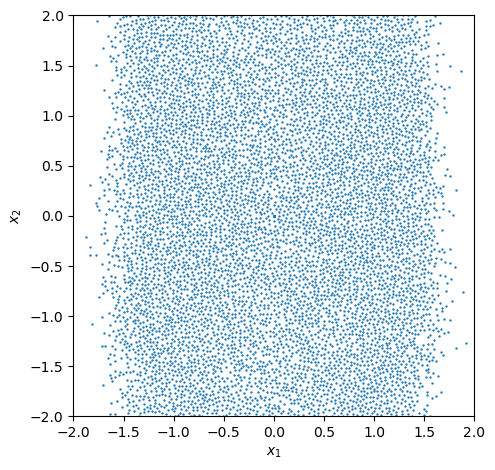

In [4]:

fig = plt.figure() 
plt.scatter(net[0, :], net[1, :], s=0.5)
xmin, xmax = -2, 2
ymin, ymax = -2,2 
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')

## Post delta-net from above, save diffusion tensors to data set and plot

In [5]:

# Trajectory data
fname = f"systems/MoroCardin/data/data_solution_metad_verylong.npz"
inData = np.load(fname)
data = inData["data"]
diffusion_list = inData['diffusion_list']

data = data[:, deltanet_bool]
diffusion_list = diffusion_list[deltanet_bool, :, :]
contents = {'data':data, 'diffusion_list': diffusion_list} 
#fname = 'systems/MoroCardin/data/data_solution_deltanet'
#np.savez(fname, **contents)
